## Initialization

In [1]:
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Project description

Supermarket chain Good Seed is introducing a computer vision system for
processing customer photos. Photofixation in the checkout area will help
determine the age of customers in order to:

- Analyze purchases and offer products that may interest buyers in particular age groups


- Monitor clerks selling alcohol

Build a model that will determine the approximate age of a person from a photograph. To help, you'll have a set of photographs of people with their ages indicated

# Project Instructions

- Analyze the set of photographs


- Prepare the data for training


- Train the neural network and calculate its quality

## Load Data

The dataset is stored in the `/datasets/faces/` folder, there you can find
- The `final_files` folder with 7.6k photos
- The `labels.csv` file with labels, with two columns: `file_name` and `real_age`

Given the fact that the number of image files is rather high, it is advisable to avoid reading them all at once, which would greatly consume computational resources. We recommend you build a generator with the ImageDataGenerator generator. This method was explained in Chapter 3, Lesson 7 of this course.

The label file can be loaded as an usual CSV file.

In [2]:
#loading dataset
labels = pd.read_csv('/datasets/faces/labels.csv')
print('Data has been read correctly!')

Data has been read correctly!


In [3]:
# Checking 0's
def zero_check(df):
    for i in df:
        print(i,len(df[df[i]==0]))
        
# function to determine if columns in file have null values        
def get_percent_of_na(df, num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index, s.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('{} has {} nulls, which is {:.{}%} percent of Nulls'.format(column, num_of_nulls, percent, num))
    if count != 0:
        print("\033[1m" + 'There are {} columns with NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'There are no columns with NA.' + "\033[0m")       
        
# function to display general information about the dataset
def general_info(df):
    print("\033[1m" + "\033[0m")
    display(pd.concat([df.dtypes, df.count(),df.isna().sum(),df.isna().sum()/len(df)], keys=['type','count','na','na%'],
                      axis=1))
    print()
    print("\033[1m" + 'Head:')  
    display(df.head())
    print()
    print("\033[1m" + 'Tail:')
    display(df.tail())
    print()
    print("\033[1m" + 'Info:')
    print()
    display(df.info())
    print()
    print("\033[1m" + 'Describe:')
    print()
    display(df.describe())
    print()
    print("\033[1m" + 'Describe include: all :')
    print()
    display(df.describe(include='all'))
    print()
    print("\033[1m" + 'nulls in the columns:')
    print()
    display(get_percent_of_na(df, 4)) 
    print()
    print("\033[1m" + 'Zeros in the columns:') 
    print()
    display(zero_check(df))
    print()
    print("\033[1m" + 'Shape:', df.shape)
    print()
    print()
    print('Duplicated:',"\033[1m" + 'We have {} duplicated rows\n'.format(df.duplicated().sum()) + "\033[0m")
    print()
    print("\033[1m" + 'Dtypes:')  
    display(df.dtypes)
    print()

In [4]:
#print our info data
print('information about Our "labels" dataset:')
general_info(labels)

information about Our "labels" dataset:



,type,count,na,na%
file_name,object,7591,0,0.0
real_age,int64,7591,0,0.0



Head:


,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17



Tail:


,file_name,real_age
7586,007608.jpg,14
7587,007609.jpg,37
7588,007610.jpg,28
7589,007611.jpg,20
7590,007612.jpg,47



Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


None


Describe:



,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000



Describe include: all :



,file_name,real_age
count,7591,7591.000000
unique,7591,NaN
top,000530.jpg,NaN
freq,1,NaN
mean,NaN,31.201159
std,NaN,17.145060
min,NaN,1.000000
25%,NaN,20.000000
50%,NaN,29.000000
75%,NaN,41.000000



nulls in the columns:


There are no columns with NA.


None


Zeros in the columns:

file_name 0
real_age 0


None


Shape: (7591, 2)


Duplicated: We have 0 duplicated rows


Dtypes:


file_name    object
real_age      int64
dtype: object

### Findings

- Our dataset have 7591 rows and two columns two 'file_name' and 'real_age' 


- There isn't any missing values or duplicated rows in our dataset


- The dtypes is object for the 'file_name' and integer for the 'real_age'


- After first look in our data we found that our youngest person is 1 year old and the oldest one is 100 , when the avg is 31 

## EDA

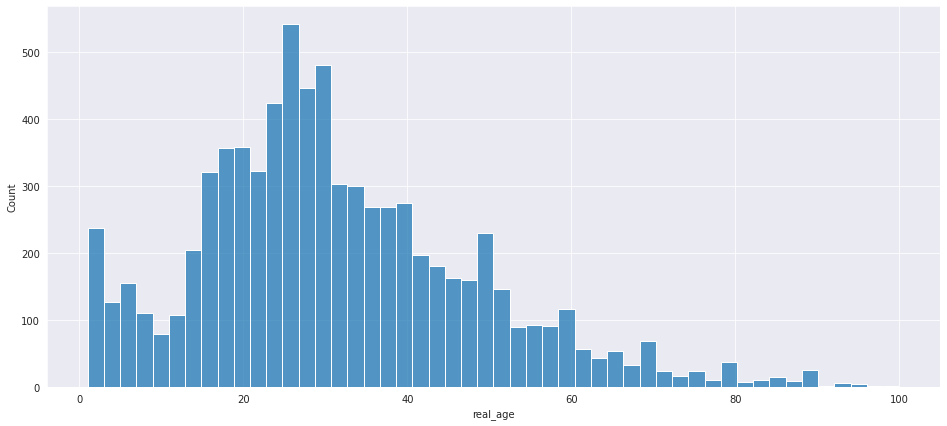

In [5]:
#plot an hist of real age column to see the distribution in our dataset
plt.figure(figsize=(16,7))
sns.histplot(labels['real_age'], bins = 50)
plt.show();

In [6]:
datagen = ImageDataGenerator(rescale=1./255)

data_flow = datagen.flow_from_dataframe(
    dataframe = labels,
    directory = '/datasets/faces/final_files/',
    x_col = 'file_name',
    y_col = 'real_age',
    target_size = (224,244),
    batch_size = 32,
    class_mode = 'raw',
    seed = 12345)

Found 7591 validated image filenames.


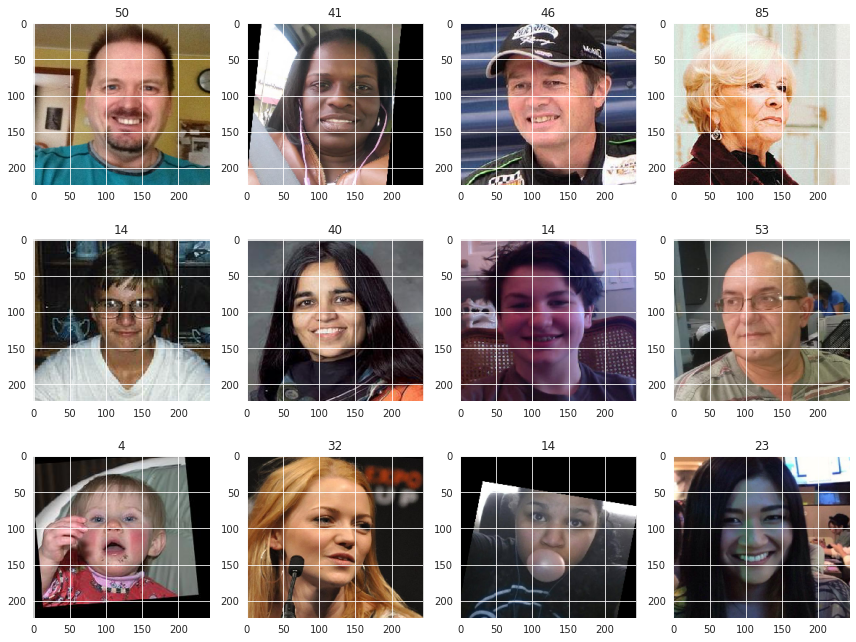

In [7]:
def show_images(batch, predictions=None):
    fig = plt.figure(figsize=(12,24))
    
    for i in range(12):
        fig.add_subplot(8,4, i+1)
        plt.imshow(batch[0][i])
        title = batch[1][i]
        if predictions is not None:
            title = f'gt: {title}, prediction: {round(predictions[i])}'
        plt.title(title)
        
    fig.tight_layout()

show_images(next(data_flow))

### Findings

- When we look deep into our plot we can see that our highest peak in age is between 20-40 which is also what we found in our first look at our dataset with avg of 31 years old , now older than 20 that come to buy alcohol isn't issue , but if the person is under 20 our even under 10 years old this need to bring alert somthing is wrong here 


- From the photos we can see that our system works hard to figure it out since some photos noisy , some rotate in a way that leave empty space etc, to make our system works better we need to learn what is relevant and whats not


- Our task is regression


- We need that our final layer will be with only one neuron since this need to return single value output , so we going to add it to the backbone of ResNet50 by add Dense layer



- To avoid negetive values we going to use 'ReLu' activation to transform them into zeros


- To suitable our loss function is 'Mse' and for the metric we are going to use 'Mae' it should be less than 8

## Modelling

Define the necessary functions to train your model on the GPU platform and build a single script containing all of them along with the initialization section.

To make this task easier, you can define them in this notebook and run a ready code in the next section to automatically compose the script.

The definitions below will be checked by project reviewers as well, so that they can understand how you built the model.

In [8]:
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [9]:
def load_train(path):
    
    """
    It loads the train part of dataset from path
    """
    
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(validation_split=0.25,rescale = 1/255)
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory= path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode = 'raw',
        subset='training',
        seed=12345) 

    return train_gen_flow

Since augmentation will give us back less 'Mae' value we don't use it 

In [10]:
def load_test(path):
    
    """
    It loads the validation/test part of dataset from path
    """
    
    labels = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(validation_split=0.25,rescale = 1/255)
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory= path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode = 'raw',
        subset='validation',
        seed=12345) 

    return test_gen_flow

In [11]:
def create_model(input_shape):
    
    """
    It defines the model
    """
    backbone = ResNet50(weights='imagenet',input_shape=input_shape,include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    
    optimizer = Adam(lr=0.00025)
    
    model.compile(optimizer=optimizer, loss = 'mse', metrics=['mae'])
    
    return model

In [12]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Trains the model given the parameters
    """

    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
        
    model.fit(
        train_data,
        validation_data=test_data,
        batch_size=batch_size,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        verbose=1,
    )

    return model

### Prepare the Script to Run on the GPU Platform

Given you've defined the necessary functions you can compose a script for the GPU platform, download it via the "File|Open..." menu, and to upload it later for running on the GPU platform.

N.B.: The script should include the initialization section as well. An example of this is shown below.

In [13]:
# prepare a script to run on the GPU platform

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

### Output

Place the output from the GPU platform as an Markdown cell here.

Train for 356 steps, validate for 119 steps

2022-09-01 08:17:27.739744: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-09-01 08:17:28.260447: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7

Epoch 1/20

356/356 [==============================] - 69s 194ms/step - loss: 192.1175 - mae: 10.3141 - val_loss: 419.2538 - val_mae: 15.4272

Epoch 2/20

356/356 [==============================] - 56s 159ms/step - loss: 92.4913 - mae: 7.3314 - val_loss: 176.6255 - val_mae: 10.0260

Epoch 3/20

356/356 [==============================] - 55s 154ms/step - loss: 55.5606 - mae: 5.7543 - val_loss: 89.7396 - val_mae: 7.2898

Epoch 4/20

356/356 [==============================] - 52s 147ms/step - loss: 37.0555 - mae: 4.6933 - val_loss: 80.5386 - val_mae: 6.7075

Epoch 5/20

356/356 [==============================] - 39s 110ms/step - loss: 23.9680 - mae: 3.8133 - val_loss: 85.9720 - val_mae: 6.8872

Epoch 6/20

356/356 [==============================] - 39s 109ms/step - loss: 17.8855 - mae: 3.2404 - val_loss: 80.9181 - val_mae: 6.7417

Epoch 7/20

356/356 [==============================] - 39s 109ms/step - loss: 14.4955 - mae: 2.9238 - val_loss: 85.5785 - val_mae: 6.8047

Epoch 8/20

356/356 [==============================] - 39s 109ms/step - loss: 13.2715 - mae: 2.8250 - val_loss: 86.0993 - val_mae: 6.7737

Epoch 9/20

356/356 [==============================] - 39s 108ms/step - loss: 13.9085 - mae: 2.8175 - val_loss: 110.1199 - val_mae: 8.2584

Epoch 10/20

356/356 [==============================] - 38s 108ms/step - loss: 13.5669 - mae: 2.8235 - val_loss: 83.3367 - val_mae: 6.9050

Epoch 11/20

356/356 [==============================] - 39s 108ms/step - loss: 14.0805 - mae: 2.8435 - val_loss: 97.3081 - val_mae: 7.3703

Epoch 12/20

356/356 [==============================] - 39s 108ms/step - loss: 12.9221 - mae: 2.7506 - val_loss: 94.6343 - val_mae: 7.6627

Epoch 13/20

356/356 [==============================] - 39s 109ms/step - loss: 13.4987 - mae: 2.8012 - val_loss: 73.0402 - val_mae: 6.4060

Epoch 14/20

356/356 [==============================] - 39s 108ms/step - loss: 10.9416 - mae: 2.5242 - val_loss: 80.8554 - val_mae: 6.6024

Epoch 15/20

356/356 [==============================] - 39s 109ms/step - loss: 10.7699 - mae: 2.4921 - val_loss: 73.6566 - val_mae: 6.3604

Epoch 16/20

356/356 [==============================] - 39s 108ms/step - loss: 9.8654 - mae: 2.3819 - val_loss: 77.4286 - val_mae: 6.5922

Epoch 17/20

356/356 [==============================] - 39s 108ms/step - loss: 10.6699 - mae: 2.4775 - val_loss: 128.1499 - val_mae: 8.7654

Epoch 18/20

356/356 [==============================] - 39s 108ms/step - loss: 10.1155 - mae: 2.4279 - val_loss: 74.1783 - val_mae: 6.3859

Epoch 19/20

356/356 [==============================] - 38s 108ms/step - loss: 8.8679 - mae: 2.2738 - val_loss: 74.8530 - val_mae: 6.4298

Epoch 20/20

356/356 [==============================] - 38s 108ms/step - loss: 8.5301 - mae: 2.2181 - val_loss: 80.5556 - val_mae: 6.7482

## Conclusions

We start by explorer our data that and we discovry that it contented 7591 rows in two columns 'file_name' and 'real_age', with no missing values our duplicated. We also found that our youngest person is 1 year old and the oldest one is 100 , that our avg is 31 , the same as shown later in the plot of our EDA the highest peak between 20-40 years old. now as long as the system can avid from younger people under 20 or even worse under 10 years old that try to buy alcohol drinks , our system need to aleart about it and stop this action.

Then we found that our system done nice job by find the age of the person in the photos, when it's deal with noisy, rotate, and not the best quality images. so, the system needs to learn what in the photo is relevant and what is not.

After that we trained our Neural network to recognized the age of the person in the photos , than we choose model was backbone of 'ResNet50' with specified activation of 'ReLu' to transform the negative values into 0's and add our final layer with one neuron to return a single output obtaind by regression. For our loss function we use 'mse' with 'mae' as metric , we didn't use any kind or augmentation defining training and testing set and choose batch size of 16 and 'adam' lr of 0.00025.

There is no doubt that in a world where digital means are found both in the workplace, and in the mobile devices we take with us and practically everywhere and in every corner, the path of facial recognition systems with a high level of accuracy will reduce the risk of identity theft, maintaining privacy as much as possible in banking and medical systems, will reduce the possibility of fraud And you will prevent and filter things like the sale of tobacco products and alcohol at young ages. So it is true that these steps will end the public with such and other concerns, especially in the elderly, but once the systems prove how good and accurate and secure they are, the use will increase and improve the services we consume every day.

When talking about the future, it is certainly possible to include in it one of the countries with an especially large population percentage, this is China, a country that has already implemented many changes in order to improve the quality of life and perhaps also the possibility of tracking its citizens more easily such as ATMs that recognize your face instead of entering the same outdated plastic card or withdrawal code.

# Checklist

- [X]  Notebook was opened
- [X]  The code is error free
- [X]  The cells with code have been arranged by order of execution
- [X]  The exploratory data analysis has been performed
- [X]  The results of the exploratory data analysis are presented in the final notebook
- [X]  The model's MAE score is not higher than 8
- [X]  The model training code has been copied to the final notebook
- [X]  The model training output has been copied to the final notebook
- [X]  The findings have been provided based on the results of the model training